## The number of RA-RUs that exact $x$ STA select 
- $\binom{M_i[n]}{x} \frac{1}{R^x} (1-\frac{1}{R})^{M_i-x}$

In [40]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math


### Simulation

In [122]:
R_list = [9, 18, 37, 74, 148]
R = 37

m_list_simu = np.concatenate([np.arange(1, 11, 1), np.arange(20, 110, 10), np.arange(200, 1100, 100)])


run_times = 1000

ball_in_box_list = [0 for i in range(28)]
for idx, m_init in enumerate(m_list_simu):
    # how many ball in box ([1,2,3,4] means 0ball:1, 1ball:2, 2ball:3, 3ball:4)
    # only record up 0-9 balls
    ball_in_box = [0 for i in range(10)]
    for _ in range(run_times):
        R_arr = [0 for i in range(R)]
        for i in range(m_init):
            position = random.randint(0, R-1)
            R_arr[position] += 1
        for balls in R_arr:
            if balls < 10:
                ball_in_box[balls] += 1
    ball_in_box = [x / run_times / R for x in ball_in_box]
    print(f'm_init = {m_init}')
    print(ball_in_box)
    ball_in_box_list[idx] = ball_in_box

m_init = 1
[0.972972972972973, 0.02702702702702703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 2
[0.9465135135135135, 0.052918918918918915, 0.0005675675675675676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 3
[0.9211621621621621, 0.0765945945945946, 0.0022432432432432435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 4
[0.8959459459459459, 0.10005405405405406, 0.003945945945945946, 5.4054054054054054e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 5
[0.8717027027027027, 0.12154054054054053, 0.006675675675675676, 8.108108108108108e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 6
[0.8484594594594594, 0.14121621621621622, 0.010027027027027027, 0.00029729729729729726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 7
[0.8257297297297297, 0.1598108108108108, 0.014, 0.00045945945945945947, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 8
[0.8035945945945946, 0.17762162162162162, 0.017756756756756756, 0.001027027027027027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_init = 9
[0.780972972972973, 0.19648648648648648, 0.020972

### Analytical

- $\binom{M_i[n]}{x} \frac{1}{R^x} (1-\frac{1}{R})^{M_i-x}$

In [114]:
def combination(n, k):
    if (n < 0 or k < 0):
        print(m, x)
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

In [115]:
sta_max = 1000
ball_in_box_ana_list = [0 for i in range(sta_max+1)]
for m in range (1, sta_max+1):
    ball_in_box_ana = [0 for i in range(10)]
    for x in range (min(10, m)):
        ball_in_box_ana[x] = combination(m, x) * 1 / (R ** x) * ((1 - 1/R) ** (m-x))
    
    print(f' ---------------------------- m={m} ---------------------------- ')
    print(ball_in_box_ana)
    ball_in_box_ana_list[m] = ball_in_box_ana

 ---------------------------- m=1 ---------------------------- 
[0.972972972972973, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ---------------------------- m=2 ---------------------------- 
[0.9466764061358657, 0.05259313367421476, 0, 0, 0, 0, 0, 0, 0, 0]
 ---------------------------- m=3 ---------------------------- 
[0.9210905573213829, 0.07675754644344858, 0.002132154067873571, 0, 0, 0, 0, 0, 0, 0]
 ---------------------------- m=4 ---------------------------- 
[0.8961962179343186, 0.09957735754825761, 0.004149056564510733, 7.683438082427284e-05, 0, 0, 0, 0, 0, 0]
 ---------------------------- m=5 ---------------------------- 
[0.8719746985306883, 0.12110759701815117, 0.006728199834341731, 0.00018689443984282585, 2.5957561089281366e-06, 0, 0, 0, 0, 0]
 ---------------------------- m=6 ---------------------------- 
[0.8484078147866158, 0.14140130246443594, 0.009819534893363607, 0.00036368647753198547, 7.5768016152496965e-06, 8.41866846138855e-08, 0, 0, 0, 0]
 ---------------------------- m=7 ------

 ---------------------------- m=732 ---------------------------- 
[1.9488057152799407e-09, 3.9625716210692116e-08, 4.0231109097244363e-07, 2.7193249667581835e-06, 1.3766582644213302e-05, 5.56781786943738e-05, 0.00018739831440189698, 0.000539885620062608, 0.001359087064393718, 0.0030369723290773203]
 ---------------------------- m=733 ---------------------------- 
[1.896135290542645e-09, 3.860742133243774e-08, 3.925087835464503e-07, 2.656702970115326e-06, 1.3468008112390192e-05, 5.4545432855180275e-05, 0.0001838383107341261, 0.000530358936125832, 0.0013369464848172017, 0.0029916240786804662]
 ---------------------------- m=734 ---------------------------- 
[1.8448883907982492e-09, 3.761522441238652e-08, 3.8294388186499064e-07, 2.595508532640491e-06, 1.3175810676112494e-05, 5.3435232186456225e-05, 0.00018034390862928972, 0.0005209935138179481, 0.0013151468213390563, 0.002946903062630108]
 ---------------------------- m=735 ---------------------------- 
[1.7950265423982967e-09, 3.66484585

 ---------------------------- m=970 ---------------------------- 
[2.8691509605905197e-12, 7.730767866035566e-11, 1.0404325086372864e-09, 9.325358040378642e-09, 6.262236961837601e-08, 3.360733836186179e-07, 1.5014389592220663e-06, 5.743599828135206e-06, 1.9205161925327093e-05, 5.702273386470575e-05]
 ---------------------------- m=971 ---------------------------- 
[2.7916063400340193e-12, 7.529582656036201e-11, 1.0144021078270993e-09, 9.101441134115364e-09, 6.118190984599771e-08, 3.286828156726655e-07, 1.469942592313865e-06, 5.628946831678094e-06, 1.8841335922700285e-05, 5.6000637325803615e-05]
 ---------------------------- m=972 ---------------------------- 
[2.7161575200331e-12, 7.33362530408937e-11, 9.890208569820525e-10, 8.882872511783247e-09, 5.977432961054143e-08, 3.2145306146113394e-07, 1.4390977334857245e-06, 5.516541311695278e-06, 1.8484244325645637e-05, 5.4996331882476504e-05]
 ---------------------------- m=973 ---------------------------- 
[2.642747857329503e-12, 7.14276018

In [149]:
ball_in_box_list[27]
print(m_list_simu[22])
print(m_list[499])

500
300


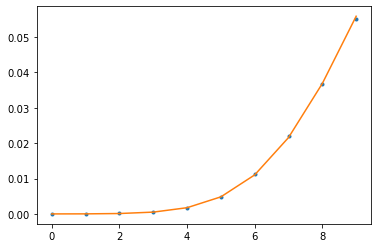

In [150]:

m_list = [i for i in range(1, sta_max+1)]

plt.plot([i for i in range(10)], ball_in_box_list[22], marker="o", markersize=3, linestyle="None")
plt.plot([i for i in range(10)], ball_in_box_ana_list[499])